In [1]:
from crpropa import *
import matplotlib.pyplot as plt
import numpy as np
import astropy

# magnetic field setup
B = JF12Field()
seed = 691342
B.randomStriated(seed)
B.randomTurbulent(seed)

# simulation setup
sim = ModuleList()
sim.add(PropagationCK(B, 1e-4, 0.1 * parsec, 30 * parsec))
obs = Observer()
obs.add(ObserverLargeSphere(Vector3d(0), 20 * kpc))
# obs.onDetection(TextOutput('galactic_backtracking.txt', Output.Event3D))
sim.add(obs)
print sim


ModuleList
  Propagation in magnetic fields using the Cash-Karp method. Target error: 0.0001, Minimum Step: 0.0001 kpc, Maximum Step: 0.03 kpc
  Observer
    ObserverLargeSphere: center = 0 0 0 Mpc, radius = 0.02 Mpc
    Flag: '' -> ''
    MakeInactive: yes




In [2]:
## Backtracking including uncertainties
R = Random()  # CRPropa random number generator
pid = - nucleusId(1,1)
meanEnergy = 10 * EeV
sigmaEnergy = 0.1 * meanEnergy  # 10% energy uncertainty
position = Vector3d(-8.5, 0, 0) * kpc

# TA hotspot coordinates
# 177.14661479433852 49.59816303592428
lat0 = (49.598)*np.pi/180.0
lon0 = (177.146)*np.pi/180.0
meanDir = Vector3d()
meanDir.setRThetaPhi(1, lat0, lon0)
sigmaDir = 0.1  # directional uncertainty
lons, lats = [], []
x,y = [], []

for i in range(100):

	energy = R.randNorm(meanEnergy, sigmaEnergy)
	direction = R.randVectorAroundMean(meanDir, sigmaDir)


	c = Candidate(ParticleState(pid, energy, position, direction))
	sim.run(c)

	d1 = c.current.getDirection()
	lons.append(d1.getPhi())
	lats.append(d1.getTheta())

	x.append(direction.getPhi())
	y.append(direction.getTheta())
    
print ("Simulations done.")

Simulations done.


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


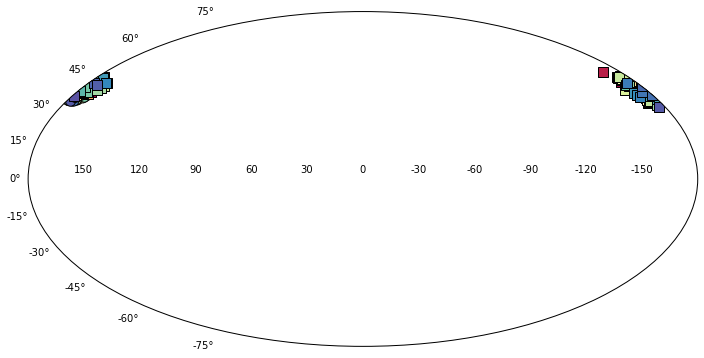

In [3]:
lats = np.pi/2 - np.array(lats)
y = np.pi/2 - np.array(y)


# observed = SkyCoord(l=x*u.radian, b=y*u.radian, frame='galactic')
# source = SkyCoord(l=lons*u.radian, b=lats*u.radian, frame='galactic')


%matplotlib inline
plt.figure(figsize=(12,7))
plt.subplot(111, projection = 'mollweide')


import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
indices = np.arange(len(lons))
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(lons))
colors = cmap(norm(indices))

# for i in range(len(lons)):
# 	plt.plot([x.flatten()[i],lons[i]], [y.flatten()[i],lats[i]], c="k")

plt.gca().set_xticklabels(np.arange(150,-180,-30))
plt.scatter(-np.array(x), y, marker='o', c=colors, s=100)
plt.scatter(-np.array(lons), lats, marker='s', c=colors, alpha=1, s=100)


# plt.scatter(-observed.supergalactic.sgl.radian, observed.supergalactic.sgb.radian, marker='o', c=colors, s=100)
# plt.scatter(-source.supergalactic.sgl.radian, source.supergalactic.sgb.radian, marker='s', c=colors, s=100)